# DATA CLEANING

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

print('Imports completed...')

Imports completed...


### Loading the Data

In [2]:
df = pd.read_csv(r'C:\Users\ShahwarN\OneDrive - Quinnox Consultancy Services Ltd\Documents\Python Scripts\House_Rent_Dataset.csv')
df.head(3)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


### Analysing the Data

* **Shape**

In [3]:
#rows,cols in data
df.shape 

(4746, 12)

* **Info**

In [4]:
#info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
#![Screenshot%20%28120%29.png](attachment:Screenshot%20%28120%29.png)
# above is example of groupby

* **Group By**

In [6]:
df.groupby('Area Type') # it is an DF <object>, so referring to col is required, to access it

In [7]:
df.groupby('Area Type')['Area Type'] #Now we have access to the column. (Series <object>)

In [8]:
df.groupby('Area Type')['Area Type'].count() #counting all unique elements in the COLUMN ='Area Type'

Area Type
Built Area        2
Carpet Area    2298
Super Area     2446
Name: Area Type, dtype: int64

In [9]:
#or

df['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

* Replacing __IMPACTLESS__ values _(important)_

In [10]:
# We saw Built Area non functional we can replace with mode of area type
df['Area Type'].replace({'Built Area': 'Super Area'}, inplace=True)
df['Area Type'].value_counts() # you see it gets replaced.

Super Area     2448
Carpet Area    2298
Name: Area Type, dtype: int64

In [11]:
#on similar lines...
df['Point of Contact'].value_counts()

# why to keep that single value....

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

In [12]:
df['Point of Contact'].replace({'Contact Builder':'Contact Owner'},inplace=True)
df['Point of Contact'].value_counts()
# now that is removed...(single point)

Contact Owner    3217
Contact Agent    1529
Name: Point of Contact, dtype: int64

In [13]:
#df.groupby(['Area Type','BHK']).first() #first row value , respectively

In [14]:
# look at DF again
df.head(3)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


* **DROP** (low impact column)

In [15]:
# All columns hold importance else we would have dropped few columns
# let us !!--DROP--!! 'posted on',just to try out.

df2 = df.drop(['Posted On'],axis='columns') #storing after dropping is important , to retain change
df2.head(3)                                        #finally, 11 col , not 12

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


* **NULL**(checking.dropping,replacing)

In [16]:
#!!--NULL CHECKING--!!
df2.isnull().head(3) # wherever NULL, it will show True, ig no null values in my data.
                     # let us confirm that.

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False


In [17]:
#checking the count of null values (total 1's or Trues basically)
df2.isnull().sum() 

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [18]:
# if there were to be !!--NULL values and SMALL in quantity.--!!
# we would rather DROP them

# df2 = df2.dropna()

In [19]:
# if there were to be !!--NULL values and LARGE in quantity.--!!
# we would rather REPLACE those values

# mean_value = df2['Column Having NULL values'].mean()
# df2['Column Having NULL values'].fillna(value = mean_value, inplace=True)

* **Unique Values**(check)

In [20]:
df2['BHK'].unique()

array([2, 1, 3, 6, 4, 5], dtype=int64)

In [21]:
#simply recalling data.
df2.head(3)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


* **Improving**(column data)
* The house price data set is quite pre-cleaned.
* creating the dirt (in bhk col, introducing unnecessary string).




* **Reading EXCEL**

In [22]:
#dummy_df = pd.read_excel(r"C:\Users\ShahwarN\OneDrive - Quinnox Consultancy Services Ltd\Documents\Python Scripts\dummy_bhk.xlsx")
#dummy_df

* **Apply(func)** & **lambda**

In [23]:
#dummy_df['BHK'] = dummy_df['BHK'].apply(lambda x: int(x.split(' ')[0]))
#dummy_df

* **Conditional (data check)**

In [24]:
#df2['BHK'].unique()

In [25]:
#df2[df2.BHK>3].head(4)

# Feature Engineering

* Feature engineering in ML consists of four main steps: Feature _Creation_, _Transformations_, Feature _Extraction_, and Feature _Selection_. Feature engineering consists of __creation, transformation, extraction, and selection of features, also known as variables.__
* Basically, it is about creating new feature / probably a column in df.

In [26]:
# let us create a copy.
# let us experiment on the 
df3 = df2.copy()
df3.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [27]:
df3['Rent per Size'] = df3['Rent']/df3['Size']  #'Rent per Size' ,a new feature/column gets added.
df3.head(3)

# BUT try not to feature engineering using the DEPENDENT variable. 
# It will affect the model efficiency.
# next cell,better we drop it.

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent per Size
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,9.090909
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,25.000000
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,17.000000


In [28]:
#Let us drop it,
df3 = df3.drop(['Rent per Size'],axis='columns')
df3.head(3)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [29]:
#check unique locations
#df3.City.unique() #if col name has space in between, the below way will work

In [30]:
#or
#df3['City'].unique()

In [31]:
len(df3['Area Locality'].unique()) # too many localities #dimensionality curse #high dimensionality problem
                                   # but anyway let us keep it,those single localities may be in different cities.

2235

In [32]:
#df3.groupby('Area Locality')['Area Locality'].count()

In [33]:
#or
df3['Area Locality'].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [34]:
#df3['Area Locality'] = df['Area Locality'].apply(lambda x: x.strip())
#area_locality = df3.groupby('Area Locality')['Area Locality'].count()
#area_locality

In [35]:
#type(area_locality) # ofcourse it will be a series(column)

In [36]:
area_locality = df3['Area Locality'].value_counts()
print(area_locality)
type(area_locality)

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64


pandas.core.series.Series

In [37]:
area_locality.sort_values(ascending = False) # NO descending parameter

Bandra West                                  37
Gachibowli                                   29
Electronic City                              24
Velachery                                    22
Miyapur, NH 9                                22
                                             ..
Gouri Shankar Nagar Colony, Banjara Hills     1
Domalguda, Himayath Nagar, NH 7               1
Ayodhya Nagar, Quthbullapur                   1
Lalaguda, Secunderabad                        1
Manikonda, Hyderabad                          1
Name: Area Locality, Length: 2235, dtype: int64

In [38]:
#area_locality_equal_1 = area_locality[area_locality==1]
#area_locality_equal_1

In [39]:
#df3['Area Locality'] = df3['Area Locality'].apply(lambda x: 'other' if x in area_locality_equal_1 else x)
df3.head(3)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [40]:
len(df3['Area Locality'].unique()) # if I grouped smaller values under 'one name', 
                                   # The unique values would have decreased.

2235

* Trying Feature Engineering on Floor

In [41]:
df3['Floor']

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4746, dtype: object

In [42]:
df3['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [43]:
# splitting the string
df3 = df3.join(df3['Floor'].str.split(' out of ', 1, expand = True).rename(columns={0:'House Floor', 1:'Total Floor'}))

In [44]:
#checking the manipulated dataframe now
df3.head(3)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,House Floor,Total Floor
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3


In [45]:
df3['House Floor']

0       Ground
1            1
2            1
3            1
4            1
         ...  
4741         3
4742         1
4743         3
4744        23
4745         4
Name: House Floor, Length: 4746, dtype: object

In [46]:
df3['House Floor'] = df3['House Floor'].apply(lambda x: 0 if x =='Ground' else x)
df3.head(20)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,House Floor,Total Floor
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2
5,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,1
6,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent,0,4
7,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent,1,2
8,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent,1,2
9,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner,1,3


In [47]:
df3['House Floor'].unique()

array([0, '1', '2', '4', '3', '5', '7', '8', 'Upper Basement', '11',
       'Lower Basement', '6', '14', '43', '13', '18', '17', '9', '19',
       '60', '34', '12', '26', '25', '53', '16', '10', '39', '32', '47',
       '28', '20', '15', '65', '40', '37', '22', '21', '30', '35', '33',
       '44', '41', '46', '27', '45', '48', '50', '24', '23', '29', '49',
       '36', '76'], dtype=object)

In [48]:
df3['House Floor'] = df3['House Floor'].apply(lambda x: -1 if x =='Upper Basement' else -2 if x =='Lower Basement' else x)
df3['House Floor'].unique()

array([0, '1', '2', '4', '3', '5', '7', '8', -1, '11', -2, '6', '14',
       '43', '13', '18', '17', '9', '19', '60', '34', '12', '26', '25',
       '53', '16', '10', '39', '32', '47', '28', '20', '15', '65', '40',
       '37', '22', '21', '30', '35', '33', '44', '41', '46', '27', '45',
       '48', '50', '24', '23', '29', '49', '36', '76'], dtype=object)

In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
 11  House Floor        4746 non-null   object
 12  Total Floor        4742 non-null   object
dtypes: int64(4), object(9)
memory usage: 482.1+ KB


In [50]:
# As checked in previous cell 'House Floor' and 'Total Floor' are objects
# We want them to be INT (for next logic especially)

df3['House Floor'] = df3['House Floor'].astype('int64')

In [51]:
# checking types after changing
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
 11  House Floor        4746 non-null   int64 
 12  Total Floor        4742 non-null   object
dtypes: int64(5), object(8)
memory usage: 482.1+ KB


In [52]:
df3['Total Floor'].isnull().sum()

4

In [53]:
# we gotta drop them
df3 = df3.dropna()
df3['Total Floor'].isnull().sum()

0

In [54]:
# earlier NULL values were there so, the TYPE would just not convert to INT
# Now it will convert object to int.

df3['Total Floor'] = df3['Total Floor'].astype('int64')
df3['Total Floor'] # yeah, now you can see.

0        2
1        3
2        3
3        2
4        2
        ..
4741     5
4742     4
4743     5
4744    34
4745     5
Name: Total Floor, Length: 4742, dtype: int64

In [55]:
df3 = df3.drop(['Floor'],axis='columns')
df3.head(3)

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,House Floor,Total Floor
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3


* **Categorical to Numerical**(Text to Number)
* Let us go with Label encoder.
* In label encoding, we replace the categorical value with a numeric value between 0 and the number of classes minus 1. If the categorical variable value contains 5 distinct classes, we use (0, 1, 2, 3, and 4).
* We use _LabelEncoder_ class using scikit-learn library.
* As Label Encoding in Python is part of _data preprocessing_, hence we have taken an help of preprocessing module from sklearn package and import LabelEncoder class.
* We create _instance_ of LabelEncoder().
* Apply _fit_ and _transform_ which does the trick to assign numerical value to categorical value.

In [56]:
# Creating Label Encoder
label_encoder = preprocessing.LabelEncoder()

# Label Encoder works by alphabetical order
#df3['Floor_LE'] = label_encoder.fit_transform(df3['Floor'])
#df3.head(8)

In [57]:
#print('Floor : ', df3['Floor'].unique())
#print('Floor_LE : ', df3['Floor_LE'].unique())

In [58]:
# Let us Encode all the columns at once..
col = df3.columns

for c in col:
    if isinstance(df3[c][0], str):
        df3[c] = label_encoder.fit_transform(df3[c])
df3.head(3)

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,House Floor,Total Floor
0,2,10000,1100,1,221,4,2,1,2,1,0,2
1,2,20000,800,1,1525,4,1,1,1,1,1,3
2,2,17000,1000,1,1758,4,1,1,1,1,1,3


In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4742 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   BHK                4742 non-null   int64
 1   Rent               4742 non-null   int64
 2   Size               4742 non-null   int64
 3   Area Type          4742 non-null   int32
 4   Area Locality      4742 non-null   int32
 5   City               4742 non-null   int32
 6   Furnishing Status  4742 non-null   int32
 7   Tenant Preferred   4742 non-null   int32
 8   Bathroom           4742 non-null   int64
 9   Point of Contact   4742 non-null   int32
 10  House Floor        4742 non-null   int64
 11  Total Floor        4742 non-null   int64
dtypes: int32(6), int64(6)
memory usage: 499.5 KB


# MODEL BUILDING

In [60]:
#x variable (independent variable)
#x = df3.drop(['Rent','Area Locality'],axis='columns') #since dependent var is Rent, so drop it ,rest cols are independent
#x.head(3)

features = ['BHK', 'Size', 'Area Type', 'City', 'Furnishing Status',
           'Tenant Preferred', 'Bathroom', 'Point of Contact', 'House Floor',
           'Total Floor']

x = df3[features]
y = df3['Rent']   #y variable (dependent variable), prediction variable

In [61]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=0) 
# random state (controls shuffling before split)
# rs=0, means , for every execution the Data won't shuffle.
# None: This is the default value. This allows the function to use the global random state instance from np.random . If you call the same function multiple times with random_state=None, that function will produce different results across different executions.
# int: We can use an integer for random_state . Yes! We can use any integer including 0, but not negative ones, only positive integers. The most popular integers are 0 and 42. When we use an integer for random_state, the function will produce the same results across different executions. The results are only changed if we change the integer value.
# With !!--random_state=None--!! , we get different train and test sets across different executions and the shuffling process is out of control.
# With !!--random_state=0--!! , we get the same train and test sets across different executions.
# With !!--random_state=42--!!, we get the same train and test sets across different executions, but in this time, the train and test sets are different from the previous case with random_state=0.
# same thing only different data sets which would again repeat on subsequent executions.

__RANDOM FOREST__
* Random forest is a supervised learning algorithm.
* It uses an ensemble learning method for classification and regression. 
* Based on Bagging Technique.
* The trees in random forests run in parallel, meaning is no interaction between these trees while building the trees.

__ENSEMBLE LEARNING__
* An ensemble method is a technique that combines the predictions from multiple machine learning algorithms together.
* In order to make more accurate predictions than any individual model. 
* A model comprised of many models is called an ensemble model. 
* Bagging and Boosting are the types.
* RF uses bagging here.
* Bagging = Bootstrap Aggregation.
* Bagging is a general procedure that can be used to reduce the variance for those algorithms that have high variance, typically decision trees. Bagging makes each model run independently and then aggregates the outputs at the end without preference to any model.
* Random forest operates by constructing a multitude of decision trees(running paralelly) at training time and outputs mean prediction(regression) of individual trees.

In [62]:
# how does x_test look?
print(x_test)
type(x_test)

      BHK  Size  Area Type  City  Furnishing Status  Tenant Preferred  \
1104    1   640          1     5                  0                 1   
2612    2    75          1     2                  2                 1   
4378    1   400          0     3                  2                 1   
2950    1   200          0     2                  2                 1   
4601    2  1000          1     3                  1                 1   
...   ...   ...        ...   ...                ...               ...   
1069    1   400          1     5                  2                 0   
462     3   120          1     4                  0                 1   
4585    2  1200          1     3                  2                 1   
1366    3  1337          0     5                  1                 1   
347     3  1100          0     4                  2                 0   

      Bathroom  Point of Contact  House Floor  Total Floor  
1104         2                 1           11           23  
2

pandas.core.frame.DataFrame

In [63]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 1, n_estimators = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([ 31565.        ,  12155.        ,   8140.        ,   7346.66666667,
        14680.5       , 151938.33333333,  24483.5       ,  15870.        ,
        46240.        ,  83551.        ,  67642.        ,  12257.55555556,
        12999.34      ,  17136.91666667,  42519.92      ,  14772.5       ,
         7988.33333333,  33505.        ,  20715.        ,  26578.41      ,
        12540.        ,   6927.66666667, 142805.        ,  29240.        ,
        35404.97      ,   7453.        ,  11287.        ,  89979.91      ,
        25441.        ,  21858.5       ,   7727.5       ,  10962.44047619,
         7882.        ,   5735.5       ,  26931.        ,  18292.14285714,
        10335.        ,  19424.        ,  66200.        ,  40335.        ,
         7371.33333333,  46620.        ,  29120.        ,   8661.79047619,
        20490.        ,   8191.        ,  65920.        ,  20338.        ,
        33780.06      ,   5798.25      ,   8803.        , 252630.        ,
        47170.        ,  

In [64]:
comparing = pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred})
comparing.sample(8)

,Actual Value,Predicted Value
4433,35000,68154.000000
2217,22000,21506.666667
2165,24000,24755.000000
1419,25000,34015.000000
1547,23000,18222.666667
1351,20000,18714.000000
2027,16000,15063.000000
3530,30000,16250.333333


In [65]:
#model accuracy

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7492814906939536

In [66]:
#accuracy percent
print("ACCURACY % : ",r2_score(y_test,y_pred)*100)

ACCURACY % :  74.92814906939536


In [67]:
x.head(3)

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,House Floor,Total Floor
0,2,1100,1,4,2,1,2,1,0,2
1,2,800,1,4,1,1,1,1,1,3
2,2,1000,1,4,1,1,1,1,1,3


In [68]:
y.head(3)

0    10000
1    20000
2    17000
Name: Rent, dtype: int64

In [69]:
x.columns

Index(['BHK', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact', 'House Floor',
       'Total Floor'],
      dtype='object')

In [70]:
df2.head(3) #main is df3, this one jus for reference

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [71]:
#individual predictions

print('Enter Property Details : ')
bhk = int(input("BHK? = "))
size = int(input("Size? = "))
area_type = int(input("Area Type? = "))
#area_type = str(input("Area Type? = "))
city = int(input("City? = "))
#city = str(input("City? = "))
furnishing_stat = int(input("Furnishing Status? = "))
#furnishing_stat = str(input("Furnishing Status? = "))
tenant_pref = int(input("Tenant Preferred? = "))
#tenant_pref = str(input("Tenant Preferred? = "))
bathroom = int(input("No. of Bathrooms? = "))
poc = int(input("Point of Contact? = "))
#poc = str(input("Point of Contact? = "))
house_floor = int(input("House Floor? = "))
total_floor = int(input("Total Floor? = "))

#data = {'BHK':bhk,
#       'Size':size,
 #      'Area Type':area_type,
  #     'City':city,
   #    'Furnishing Status':furnishing_stat,
    #   'Tenant Preferred':tenant_pref,
     #  'Bathroom':bathroom,
      # 'Point of Contact':poc,
       #'House Floor':house_floor,
       #'Total Floor':total_floor}

data = np.array([[bhk,size,area_type,city,furnishing_stat,tenant_pref,bathroom,poc,house_floor,total_floor]]) #2D array imp
#data = [[bhk,size,area_type,city,furnishing_stat,tenant_pref,bathroom,poc,house_floor,total_floor]]
print(data)

#Label encode
the_col = df3.columns
for c in col:
    if isinstance(df3[c][0], str):
        df3[c] = label_encoder.fit_transform(df3[c])

print("Predicted House Price : ", model.predict(data))

#2, 1100, 1, 4, 2, 1, 2, 1, 0, 2  //PRICE:10,000
#2	1100	Super Area	Kolkata	Unfurnished	Bachelors/Family	2	Contact Owner	0	2 //PRICE:10,000

Enter Property Details : 
BHK? = 2
Size? = 1100
Area Type? = 1
City? = 4
Furnishing Status? = 2
Tenant Preferred? = 1
No. of Bathrooms? = 2
Point of Contact? = 1
House Floor? = 0
Total Floor? = 2
[[   2 1100    1    4    2    1    2    1    0    2]]
Predicted House Price :  [10960.71428571]


C:\Users\ShahwarN\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [72]:
import pickle

In [73]:
pickle.dump(model,open(r'C:\Users\ShahwarN\model_pickle_4.pkl','wb'))
model_load = pickle.load(open(r'C:\Users\ShahwarN\model_pickle_4.pkl','rb'))
print(model_load)

RandomForestRegressor(random_state=1)


In [74]:
# testing model 
# model_load.predict(x_test)
model_load.predict(data)

C:\Users\ShahwarN\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10960.71428571])

In [75]:
# SO BASICALLY MODEL CREATED + SAVES + LOADED + TESTED

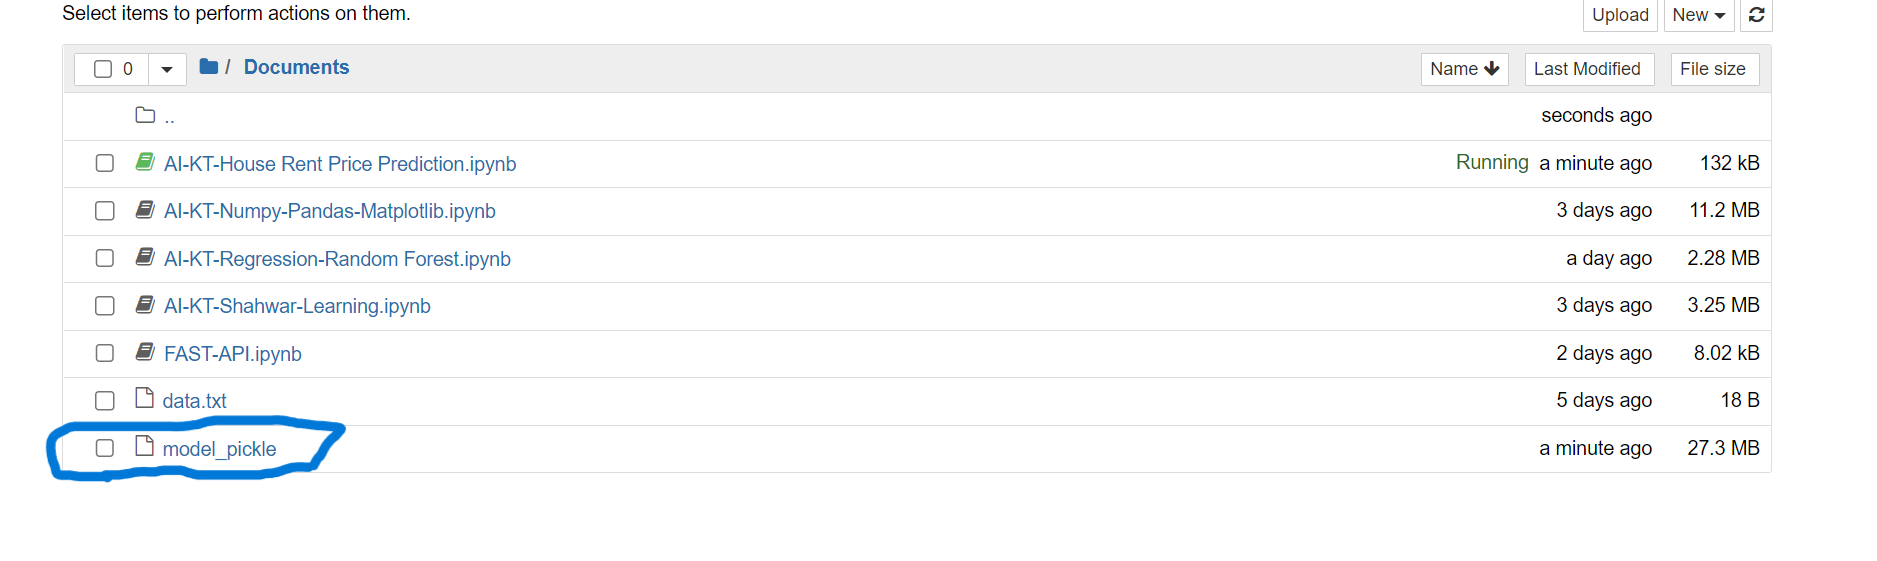

In [76]:
#with open('model_pickle','rb') as f:
#    model_object = pickle.load(f)